# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

/tmp/ipykernel_128994/3493104604.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


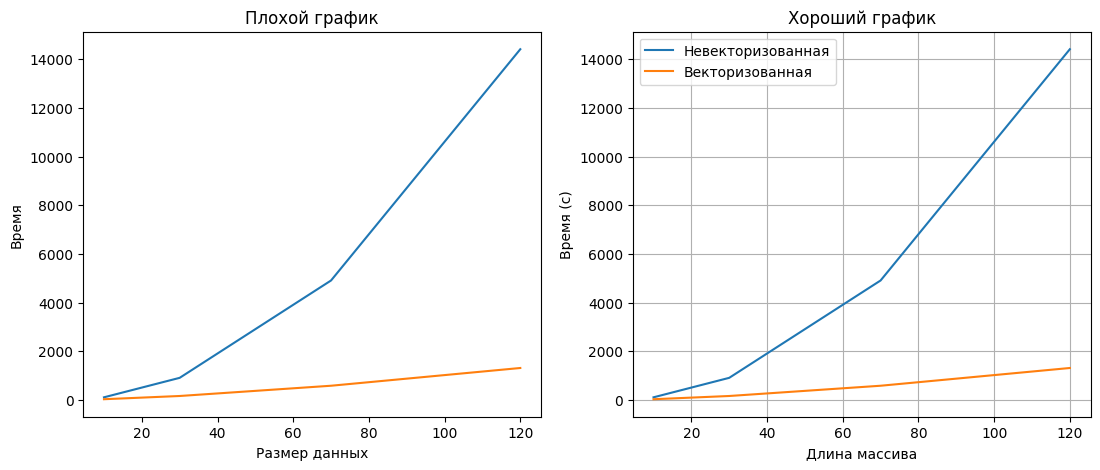

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

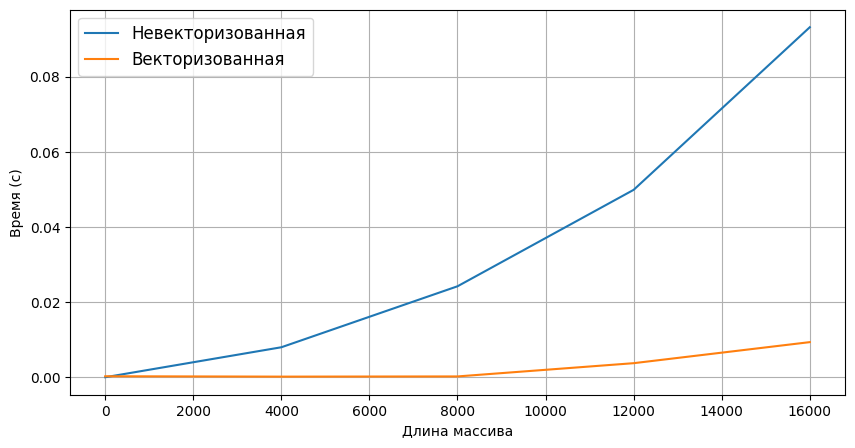

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

def prod_non_zero_diag(x):
    ans = 1
    for i in range(min(x.shape[1], x.shape[0])):
        if x[i][i] != 0:
            ans *= int(x[i, i]);
    return ans;

def prod_non_zero_diag_numpy(X):
    a = np.array(X.diagonal())
    a[a == 0] = 1
    return np.prod(a)

data_size = []
time_np = []
time_no_np = []

for i in range(1, 20000, 4000):
    data_size.append(i)
    A = np.array(np.random.randint(0, 1000, (i, i)))

    start_time = time.time()
    prod_non_zero_diag(A)
    end_time = time.time()
    time_no_np.append(end_time - start_time)

    start_time = time.time()
    prod_non_zero_diag_numpy(A)
    end_time = time.time()
    time_np.append(end_time - start_time)

plt.figure(figsize=(10, 5))

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.plot(data_size, time_no_np, label=u"Невекторизованная")
plt.plot(data_size, time_np, label=u"Векторизованная")

plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


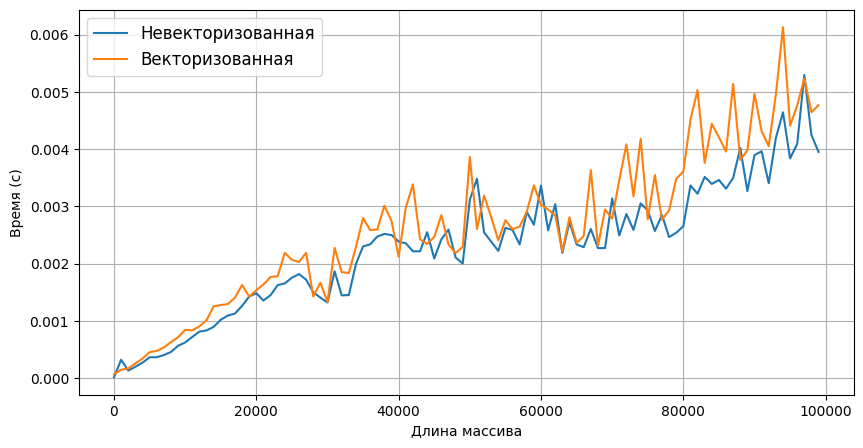

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

def are_multisets_equal(x, y):
    if (len(x) != len(y)):
        return False
    x.sort()
    y.sort()
    for i in range(len(x)):
        if x[i] != y[i]:
            return False
    return True

def are_multisets_equal_np(x, y):
    np.sort(x)
    np.sort(y)
    return np.array_equal(x, y)

data_size = []
time_np = []
time_no_np = []

for i in range(1, 100000, 1000):
    data_size.append(i);
    A = np.array(np.random.randint(0, 1000, (i)))
    B = np.array(np.random.randint(0, 1000, (i)))

    start_time = time.time()
    are_multisets_equal(A, B)
    end_time = time.time()
    time_no_np.append(end_time - start_time)

    start_time = time.time()
    are_multisets_equal_np(A, B)
    end_time = time.time()
    time_np.append(end_time - start_time)

plt.figure(figsize=(10, 5))

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.plot(data_size, time_no_np, label=u"Невекторизованная")
plt.plot(data_size, time_np, label=u"Векторизованная")

plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

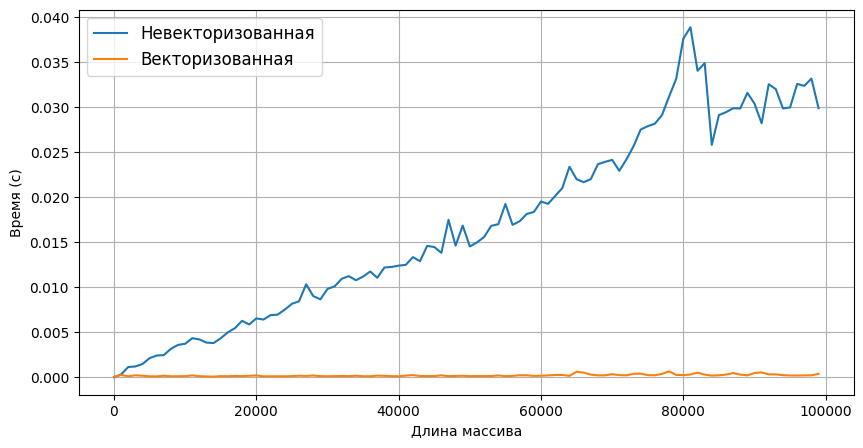

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

def max_after_zero(x):
    ans = -1
    for i in range(1, len(x)):
        if x[i - 1] == 0:
            ans = max(ans, x[i])
    return ans

def max_after_zero_numpy(x):
    index_zero = np.array(np.where(x == 0)) + 1
    element_after_zero = x[index_zero]
    if element_after_zero.shape[0] > 0:
        return -1
    return element_after_zero.max()

data_size = []
time_np = []
time_no_np = []

for i in range(1, 100000, 1000):
    data_size.append(i);
    A = np.array(np.random.randint(0, 1000, (i)))

    start_time = time.time()
    max_after_zero(A)
    end_time = time.time()
    time_no_np.append(end_time - start_time)

    start_time = time.time()
    max_after_zero_numpy(A)
    end_time = time.time()
    time_np.append(end_time - start_time)

plt.figure(figsize=(10, 5))

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.plot(data_size, time_no_np, label=u"Невекторизованная")
plt.plot(data_size, time_np, label=u"Векторизованная")

plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [ ]:
# code here

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

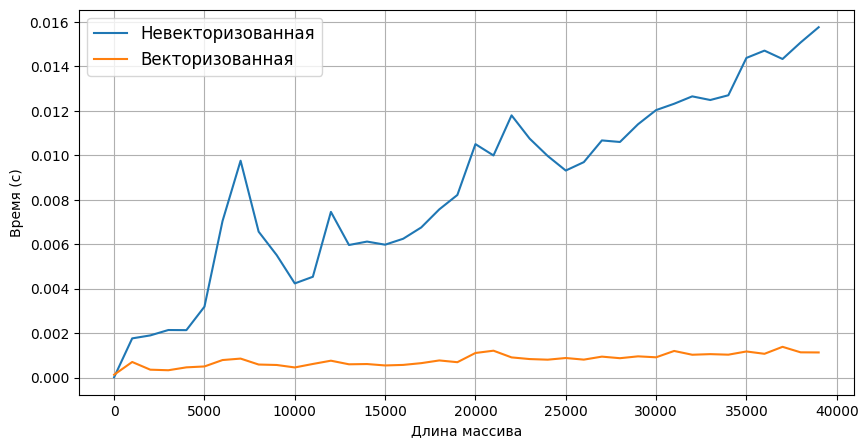

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

def run_length_encoding_numpy(x):
    return np.unique(x, return_counts=True)

def run_length_encoding(x):
    x.sort()
    element = [x[0]]
    count = []
    cnt = 1
    for i in range(1, len(x)):
        if x[i - 1] != x[i]:
            element.append(x[i])
            count.append(cnt)
            cnt = 1
        else:
            cnt += 1
    count.append(cnt)
    return [element, count]

data_size = []
time_np = []
time_no_np = []

for i in range(1, 40000, 1000):
    data_size.append(i);
    A = np.array(np.random.randint(0, 1000, (i)))

    start_time = time.time()
    run_length_encoding(A)
    end_time = time.time()
    time_no_np.append(end_time - start_time)

    start_time = time.time()
    run_length_encoding_numpy(A)
    end_time = time.time()
    time_np.append(end_time - start_time)

plt.figure(figsize=(10, 5))

plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")

plt.plot(data_size, time_no_np, label=u"Невекторизованная")
plt.plot(data_size, time_np, label=u"Векторизованная")

plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### Отчет ###
В ходе данной работы мы научились работать с базовыми функциями *NumPy*, получили, что векторизорованные способы решения различных задач ***более быстрые*** чем невекторизированные.

Также были полученны графики производительности решений из которых и были сделанны выводы о <u>скорости работы</u>.

